In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pricing_data = pd.read_csv("Competition_Data.csv")

In [3]:
pricing_data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [4]:
pricing_data.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


In [5]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


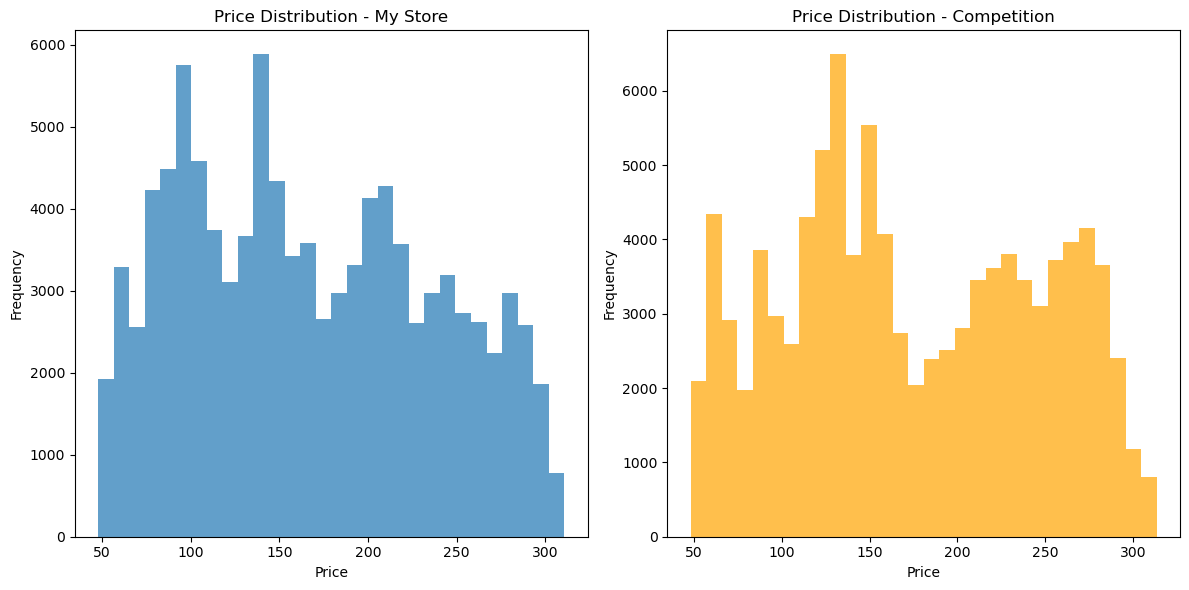

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(pricing_data["Price"],bins=30,alpha=0.7,label="My Store")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution - My Store")

plt.subplot(1,2,2)
plt.hist(pricing_data["Competition_Price"],bins=30,alpha=0.7,color="orange",label="Competition")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution - Competition")

plt.tight_layout()
plt.show()

It shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.

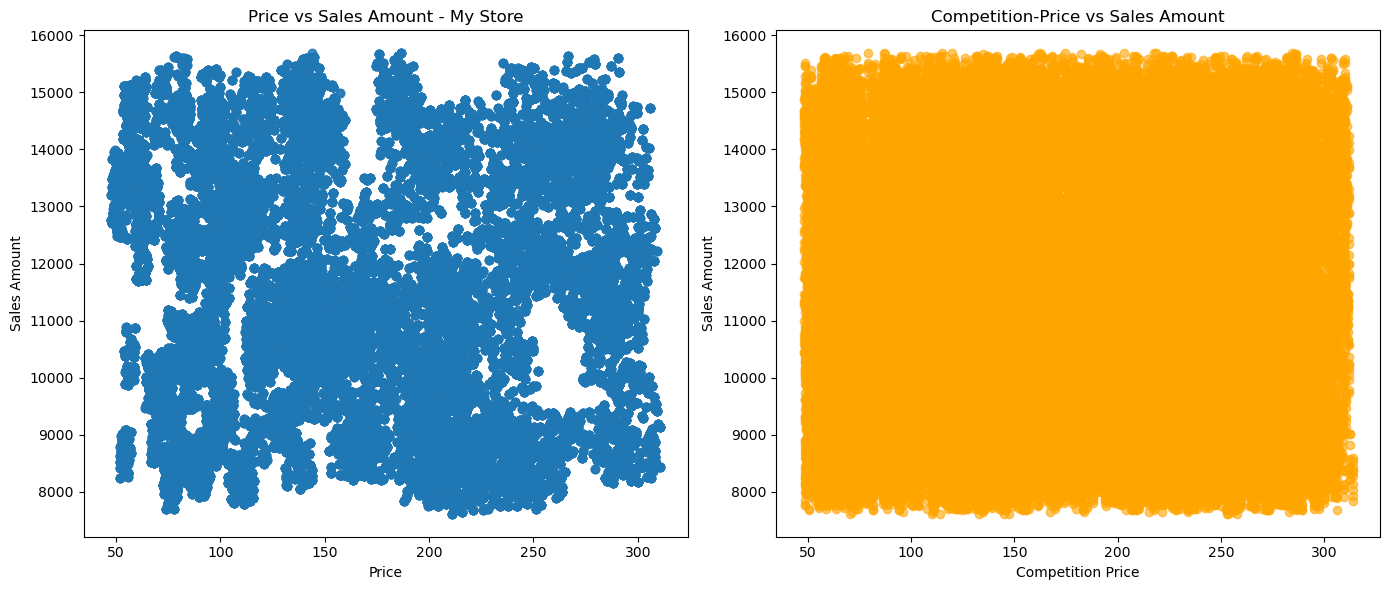

In [7]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(pricing_data["Price"],pricing_data["Sales_Amount"],alpha = 0.6,label="My Store")
plt.xlabel("Price")
plt.ylabel("Sales Amount")
plt.title("Price vs Sales Amount - My Store")

plt.subplot(1,2,2)
plt.scatter(pricing_data["Competition_Price"],pricing_data["Sales_Amount"],alpha = 0.6,color="orange",label="Competition")
plt.xlabel("Competition Price")
plt.ylabel("Sales Amount")
plt.title("Competition-Price vs Sales Amount")

plt.tight_layout()
plt.show()

The scatter plots compare the relationship between price and sales amount for our store (left) and the competition (right). 

For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend. 

In contrast, the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance. 

It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.


## comparing prices changes over time

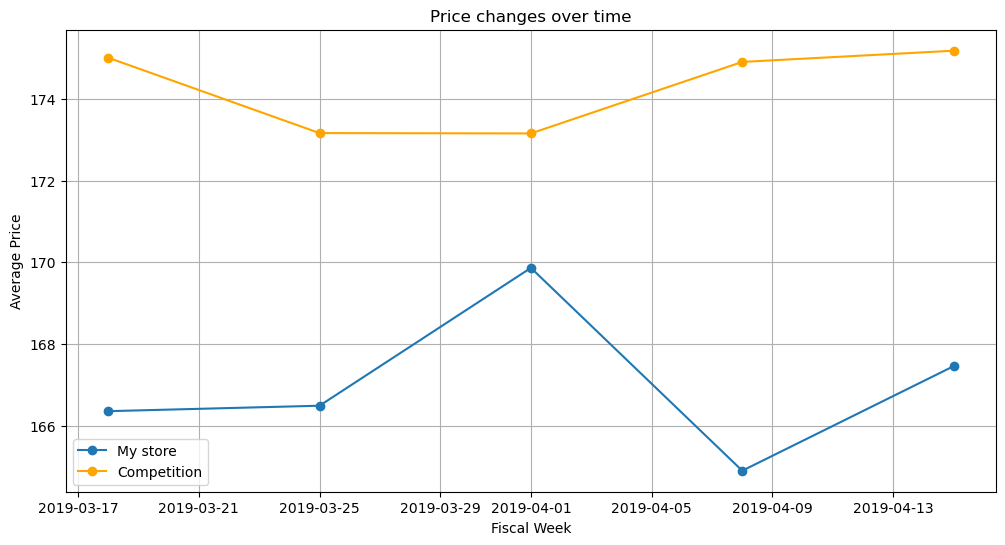

In [9]:
pricing_data["Fiscal_Week_ID"] = pd.to_datetime(pricing_data["Fiscal_Week_ID"].astype(str) + '-1', format='%Y-%U-%w')

weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price':'mean'
}).reset_index()

plt.figure(figsize=(12,6))
plt.plot(weekly_prices["Fiscal_Week_ID"],weekly_prices["Price"], label='My store', marker='o')
plt.plot(weekly_prices["Fiscal_Week_ID"],weekly_prices["Competition_Price"], label='Competition', color = 'orange',marker='o')
plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price changes over time')
plt.grid(True)
plt.legend()
plt.show()